In [192]:
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [193]:
load_dotenv(override=True)
csv_path = os.getenv('CSV_PATH')
csv_path

'wandb_output_2025-01-06-15-03-01.csv'

In [194]:
df = pd.read_csv(csv_path)
df.describe()

,target_character,branch_factor,total_iterations,n_self_alignment,total_timesteps,seed,Evaluation/llm_iteration,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
count,1798.000000,1798.0,1798.000000,1798.000000,1.798000e+03,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000
mean,1.489989,2.0,6.737486,1.754727,4.933259e+07,3.926029,3.731368,0.162341,0.711939,0.471394,19.717034,2.202892,0.310085,0.150445,0.336578,0.296125,0.513330
std,0.500039,0.0,1.292092,2.386993,5.124988e+06,2.429090,1.942302,0.243601,0.288783,0.354425,11.702168,1.046293,0.570432,0.323400,0.535679,0.371133,0.436335
min,1.000000,2.0,6.000000,0.000000,1.000000e+07,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.0,6.000000,0.000000,5.000000e+07,2.000000,2.000000,0.000000,0.533333,0.133333,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.0,6.000000,0.000000,5.000000e+07,4.000000,4.000000,0.022222,0.783333,0.416667,26.000002,2.766667,0.000000,0.000000,0.033333,0.100000,0.533333
75%,2.000000,2.0,6.000000,5.000000,5.000000e+07,5.000000,5.000000,0.266667,1.000000,0.833333,26.500000,3.000000,0.333333,0.100000,0.500000,0.566667,1.000000
max,2.000000,2.0,9.000000,5.000000,5.000000e+07,15.000000,9.000000,1.000000,1.000000,1.000000,34.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000


In [195]:
df.columns

Index(['run_id', 'final_state', 'target_character', 'pe', 'gpt_model',
       'branch_factor', 'exp_name', 'evaluator', 'total_iterations',
       'n_self_alignment', 'feedback_type', 'feedback_input_type',
       'total_timesteps', 'reward_feature', 'fewshot', 'problem', 'seed',
       'Evaluation/llm_iteration', 'Evaluation/acc_imp_perc',
       'Evaluation/exist_imp_perc', 'Evaluation/reach_imp_perc',
       'Evaluation/path_length', 'Evaluation/fn_imp_perc',
       'Evaluation/fp_imp_perc', 'Evaluation/tn_imp_perc',
       'Evaluation/tp_imp_perc', 'Evaluation/solvability',
       'Evaluation/playability'],
      dtype='object')

In [196]:
df = df[df['fewshot'] == False]
df = df[df['pe'].isin(['tot', 'got'])]
df = df[df['evaluator'] == 'hr']
df = df[df['feedback_type'] == 'default']
df = df[df['exp_name'] != 'vision']
df = df[df['gpt_model'].isin(['gpt-4o'])]
df = df[df['Evaluation/llm_iteration'] <= 6]
df = df[df['n_self_alignment'] == 0]
df

,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
48,ac0lhrgs,finished,1,tot,gpt-4o,2,def,hr,9,0,...,0.077778,1.000000,0.900000,26.666668,2.100000,0.666667,0.000000,0.233333,0.333333,0.700000
49,ac0lhrgs,finished,1,tot,gpt-4o,2,def,hr,9,0,...,0.411111,0.966667,0.866667,26.347826,1.033333,0.733333,0.733333,0.500000,0.733333,0.766667
50,ac0lhrgs,finished,1,tot,gpt-4o,2,def,hr,9,0,...,0.088889,1.000000,0.800000,26.235294,2.600000,0.133333,0.133333,0.133333,0.133333,0.566667
51,ac0lhrgs,finished,1,tot,gpt-4o,2,def,hr,9,0,...,0.011111,0.966667,0.333333,28.000000,2.900000,0.066667,0.000000,0.033333,0.033333,0.066667
52,ac0lhrgs,finished,1,tot,gpt-4o,2,def,hr,9,0,...,0.000000,1.000000,0.300000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,6xmm9nry,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.000000,0.016667,0.016667,26.000002,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
314,6xmm9nry,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.000000,0.033333,0.033333,26.000002,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
315,6xmm9nry,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.033333,0.033333,0.033333,26.000002,2.900000,0.000000,0.066667,0.033333,0.066667,1.000000
316,6xmm9nry,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.000000,0.016667,0.016667,26.000002,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [197]:
# if pe is 'tot' set the n_aux_best is 0 and n_aux_worst is 0
df.loc[df['pe'] == 'tot', 'n_aux_best'] = 0
df.loc[df['pe'] == 'tot', 'n_aux_worst'] = 0

df.loc[df['pe'] == 'got', 'n_aux_best'] = 2
df.loc[df['pe'] == 'got', 'n_aux_worst'] = 0

# change 'tot' to 'got'
df.loc[df['pe'] == 'tot', 'pe'] = 'got'

# astype to int
df['n_aux_best'] = df['n_aux_best'].astype(int)
df['n_aux_worst'] = df['n_aux_worst'].astype(int)

df

,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability,n_aux_best,n_aux_worst
48,ac0lhrgs,finished,1,got,gpt-4o,2,def,hr,9,0,...,0.900000,26.666668,2.100000,0.666667,0.000000,0.233333,0.333333,0.700000,0,0
49,ac0lhrgs,finished,1,got,gpt-4o,2,def,hr,9,0,...,0.866667,26.347826,1.033333,0.733333,0.733333,0.500000,0.733333,0.766667,0,0
50,ac0lhrgs,finished,1,got,gpt-4o,2,def,hr,9,0,...,0.800000,26.235294,2.600000,0.133333,0.133333,0.133333,0.133333,0.566667,0,0
51,ac0lhrgs,finished,1,got,gpt-4o,2,def,hr,9,0,...,0.333333,28.000000,2.900000,0.066667,0.000000,0.033333,0.033333,0.066667,0,0
52,ac0lhrgs,finished,1,got,gpt-4o,2,def,hr,9,0,...,0.300000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,6xmm9nry,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.016667,26.000002,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,0
314,6xmm9nry,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.033333,26.000002,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,0
315,6xmm9nry,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.033333,26.000002,2.900000,0.000000,0.066667,0.033333,0.066667,1.000000,2,0
316,6xmm9nry,finished,2,got,gpt-4o,2,def,hr,9,0,...,0.016667,26.000002,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2,0


In [198]:
aux_df = pd.read_csv('wandb_aux_output_2025-01-08-20-28-42.csv')
aux_df

,run_id,final_state,target_character,pe,gpt_model,branch_factor,exp_name,evaluator,total_iterations,n_self_alignment,...,Evaluation/acc_imp_perc,Evaluation/exist_imp_perc,Evaluation/reach_imp_perc,Evaluation/path_length,Evaluation/fn_imp_perc,Evaluation/fp_imp_perc,Evaluation/tn_imp_perc,Evaluation/tp_imp_perc,Evaluation/solvability,Evaluation/playability
0,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b1w0_chr-...,finished,1,got,gpt-4o,2,aux,hr,6,0,...,0.011111,0.533333,0.533333,26.000000,2.700000,0.266667,0.000000,0.033333,0.133333,0.966667
1,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b1w0_chr-...,finished,2,got,gpt-4o,2,aux,hr,6,0,...,0.000000,0.633333,0.166667,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b1w0_chr-...,finished,2,got,gpt-4o,2,aux,hr,6,0,...,0.000000,0.666667,0.016667,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b1w0_chr-...,finished,2,got,gpt-4o,2,aux,hr,6,0,...,0.033333,0.716667,0.250000,26.000000,2.900000,0.000000,0.033333,0.066667,0.033333,0.033333
4,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b1w0_chr-...,finished,2,got,gpt-4o,2,aux,hr,6,0,...,0.066667,0.400000,0.250000,26.900000,2.800000,0.000000,0.133333,0.066667,0.133333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b2w1_chr-...,finished,1,got,gpt-4o,2,aux,hr,6,0,...,0.011111,0.533333,0.433333,26.222223,2.833333,0.133333,0.000000,0.033333,0.066667,0.900000
224,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b2w1_chr-...,finished,1,got,gpt-4o,2,aux,hr,6,0,...,0.011111,0.566667,0.500000,26.545456,2.900000,0.066667,0.000000,0.033333,0.033333,0.733333
225,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b2w1_chr-...,finished,1,got,gpt-4o,2,aux,hr,6,0,...,0.011111,0.533333,0.533333,26.000000,2.700000,0.266667,0.000000,0.033333,0.133333,0.966667
226,pe-got_it-6_fit-hr_exp-aux_t-sce_aux-b2w1_chr-...,finished,1,got,gpt-4o,2,aux,hr,6,0,...,0.011111,0.500000,0.500000,26.000000,2.633333,0.333333,0.000000,0.033333,0.166667,0.966667


In [ ]:
df = pd.concat([df, aux_df], axis=0)
df = df[df['Evaluation/llm_iteration'] == 6]

df

In [221]:
grouped_df = df.groupby(['n_aux_best', 'n_aux_worst'])['Evaluation/acc_imp_perc'].agg(['mean'])
grouped_df = grouped_df.reset_index()
grouped_df

,n_aux_best,n_aux_worst,mean
0,0,0,0.328889
1,0,1,0.058889
2,1,0,0.158889
3,1,1,0.049495
4,2,0,0.076190
5,2,1,0.162222


In [228]:
pivot_df = grouped_df.pivot(index="n_aux_worst", columns="n_aux_best", values="mean")
pivot_df

n_aux_best,0,1,2
n_aux_worst,,,
0,0.328889,0.158889,0.076190
1,0.058889,0.049495,0.162222


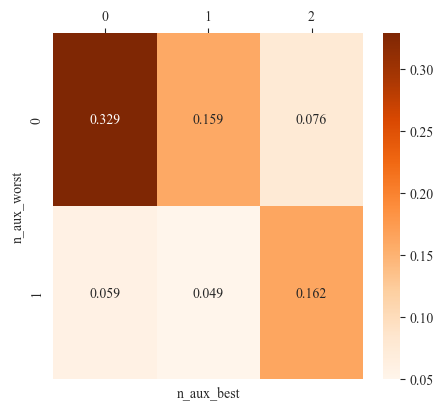

In [253]:
plt.figure(figsize=(5, 4.5))

ax = sns.heatmap(pivot_df, annot=True, fmt=".3f", cmap='Oranges')
# time new roman
plt.rcParams['font.family'] = 'Times New Roman'
ax.xaxis.tick_top()
plt.savefig('auxiliary_data_heatmap.png', dpi=300)
plt.savefig('auxiliary_data_heatmap.pdf')
plt.show()